In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.dpi"] = 600
sns.set()

In [2]:
final = pd.read_pickle("data/final.pkl")
final.head()

,title_score,desc_score,open,high,low,close,abschange,relchange
timestamp,,,,,,,,
2018-09-25,0.111867,0.161199,219.75,222.82,219.70,222.19,1.40,0.006341
2018-09-26,0.091782,0.063646,221.00,223.75,219.76,220.42,-1.77,-0.007966
2018-09-27,0.092848,0.207833,223.82,226.44,223.54,224.95,4.53,0.020552
2018-09-28,0.090798,0.094327,224.79,225.84,224.02,225.74,0.79,0.003512
2018-10-01,0.029758,0.051756,227.95,229.42,226.35,227.26,1.52,0.006733


In [3]:
def normal_scaler(content):
    content_std = content.std()
    content -= content.mean()
    return content.divide(content_std)

In [4]:
final.corr().loc[["abschange", "relchange"], ["title_score", "desc_score"]]

,title_score,desc_score
abschange,0.316428,0.378224
relchange,0.317781,0.375062


In [5]:
finalS = final.copy()
finalS.drop(columns=["open","high","low","close"], inplace=True)
finalS["title_score"] = normal_scaler(finalS["title_score"])
finalS["desc_score"] = normal_scaler(finalS["desc_score"])
finalS["abschange"] = normal_scaler(finalS["abschange"])
finalS["relchange"] = normal_scaler(finalS["relchange"])
finalS.head()

,title_score,desc_score,abschange,relchange
timestamp,,,,
2018-09-25,0.782053,1.126270,0.391507,0.384088
2018-09-26,0.304573,-0.911063,-0.245259,-0.249387
2018-09-27,0.329907,2.100182,1.020238,1.013303
2018-09-28,0.281163,-0.270320,0.268975,0.258829
2018-10-01,-1.169926,-1.159383,0.415612,0.401469


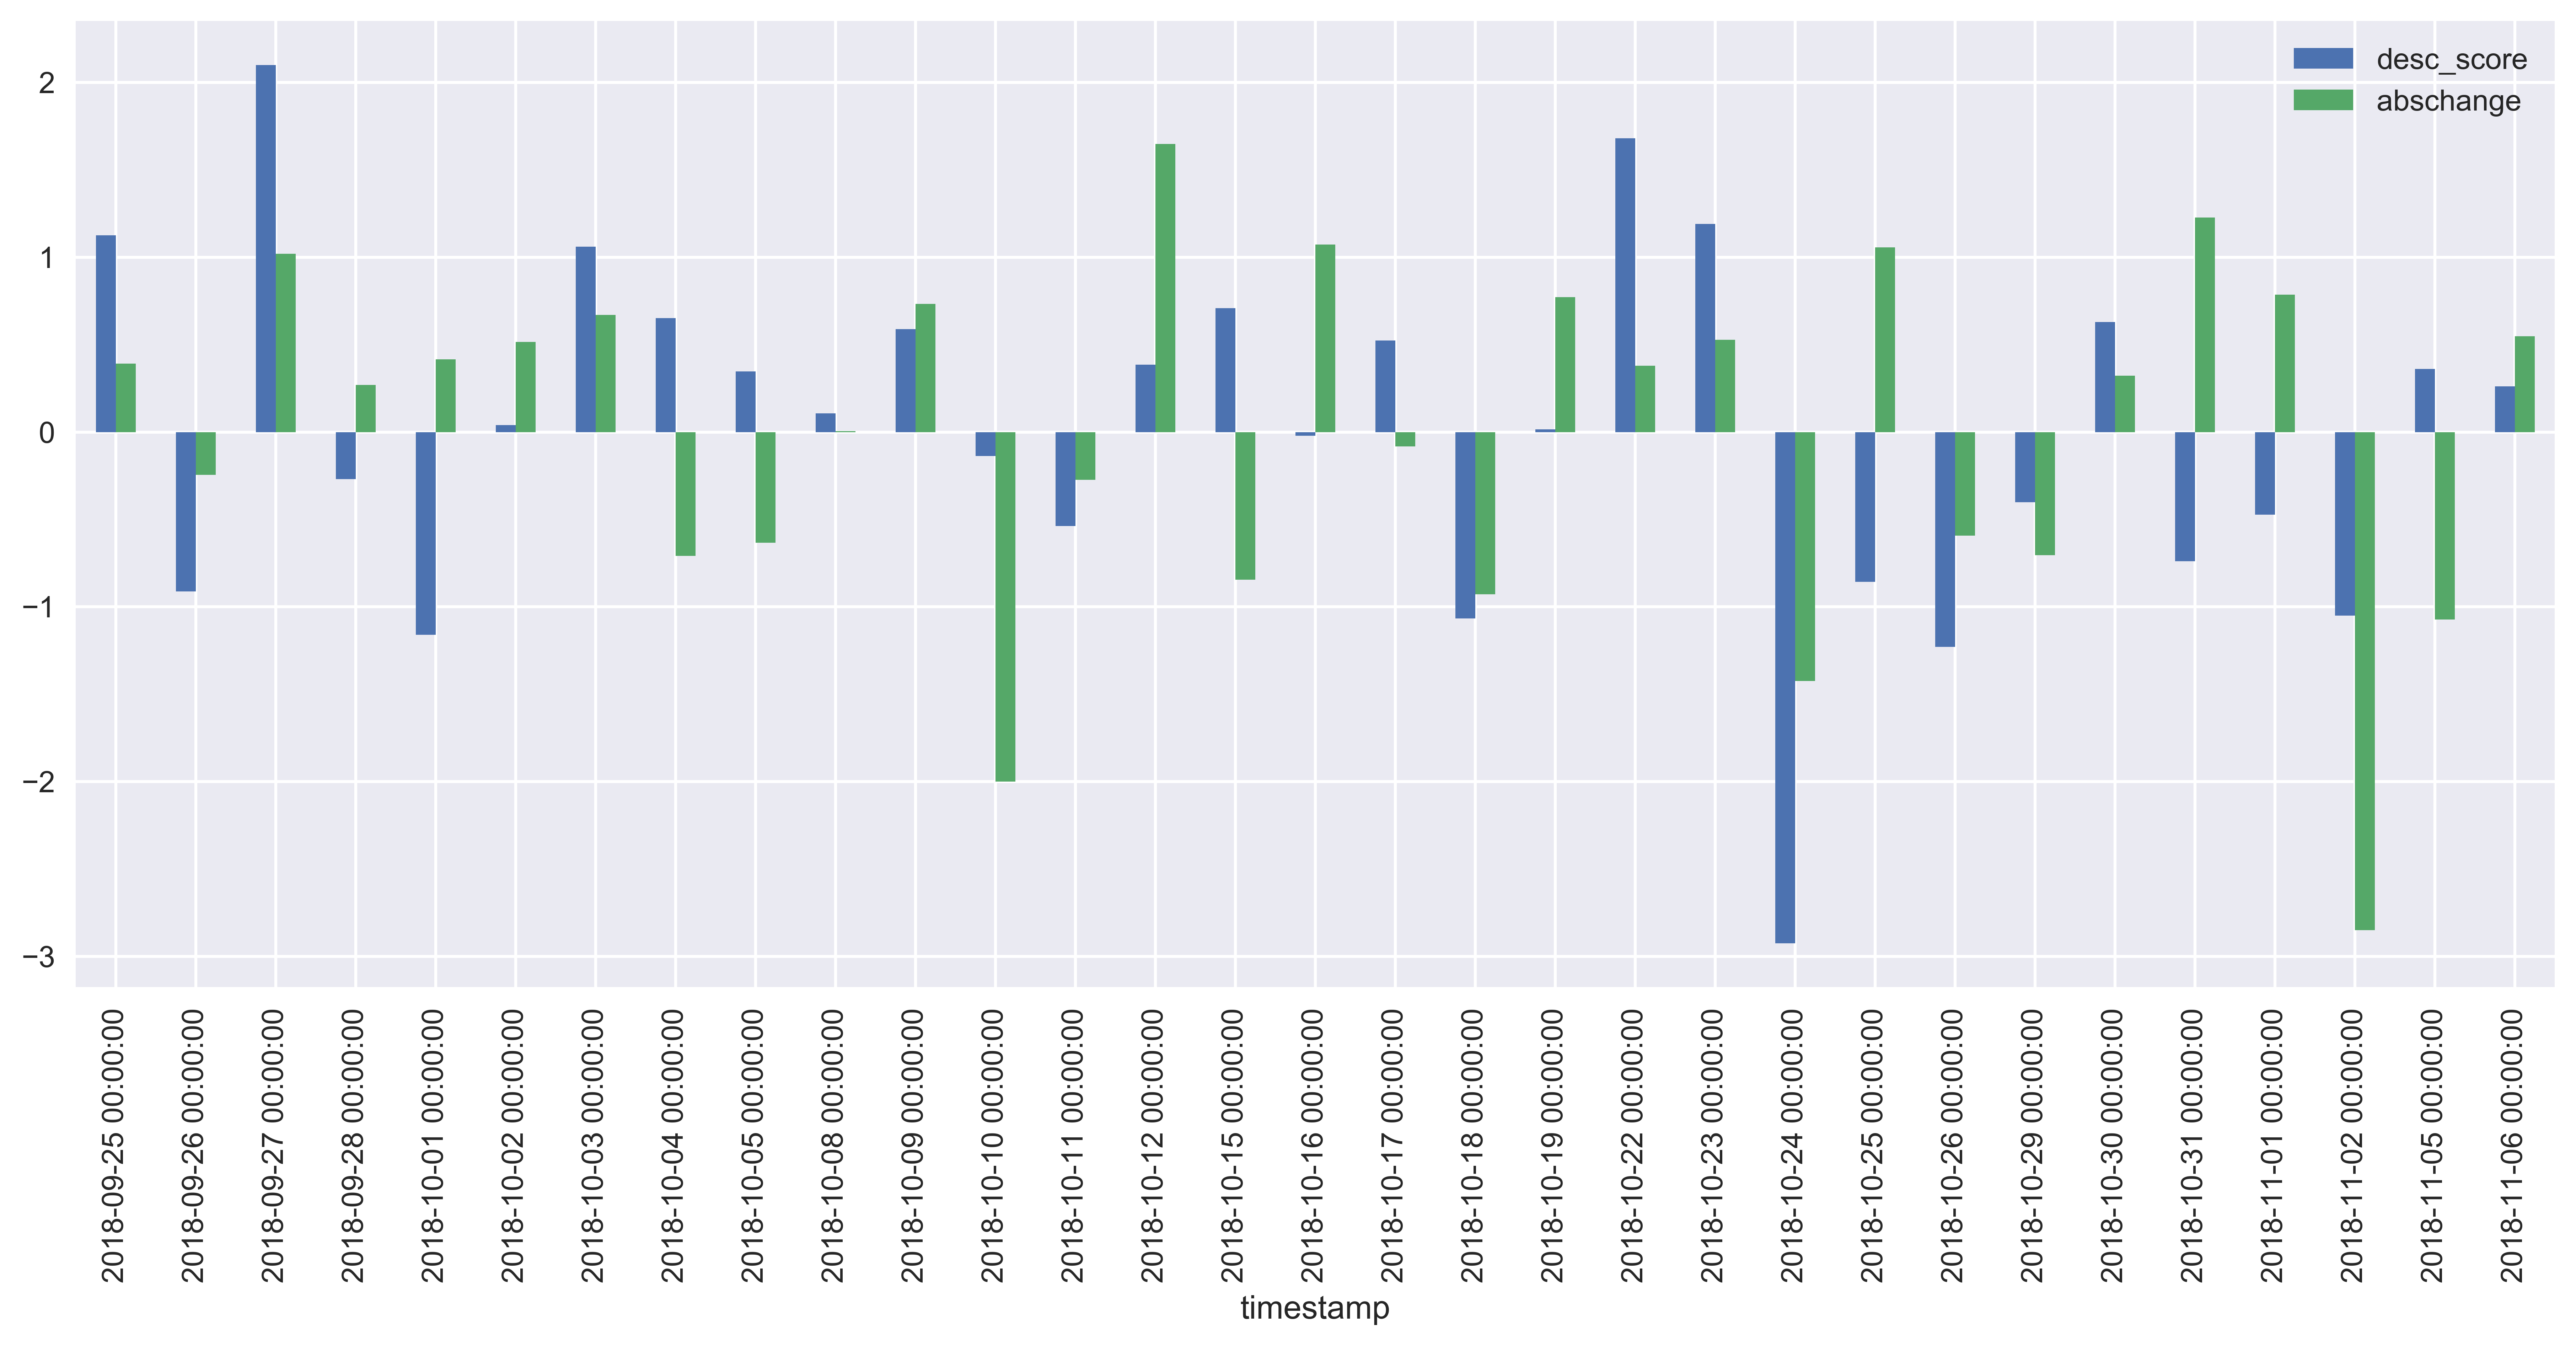

In [14]:
finalS[["desc_score", "abschange"]].plot(kind="bar")
plt.show()

In [7]:
desc_score = finalS["desc_score"]
abschange = finalS["abschange"]

In [8]:
trend_follow = np.sign(desc_score * abschange).astype("int").value_counts()[1]
trend_counter = np.sign(desc_score * abschange).astype("int").value_counts()[-1]
total = trend_follow + trend_counter

In [9]:
accuracy = trend_follow / total
print("Hypothesis proved Correct {:.2f} % of times".format(accuracy*100))

Hypothesis proved Correct 64.52 % of times


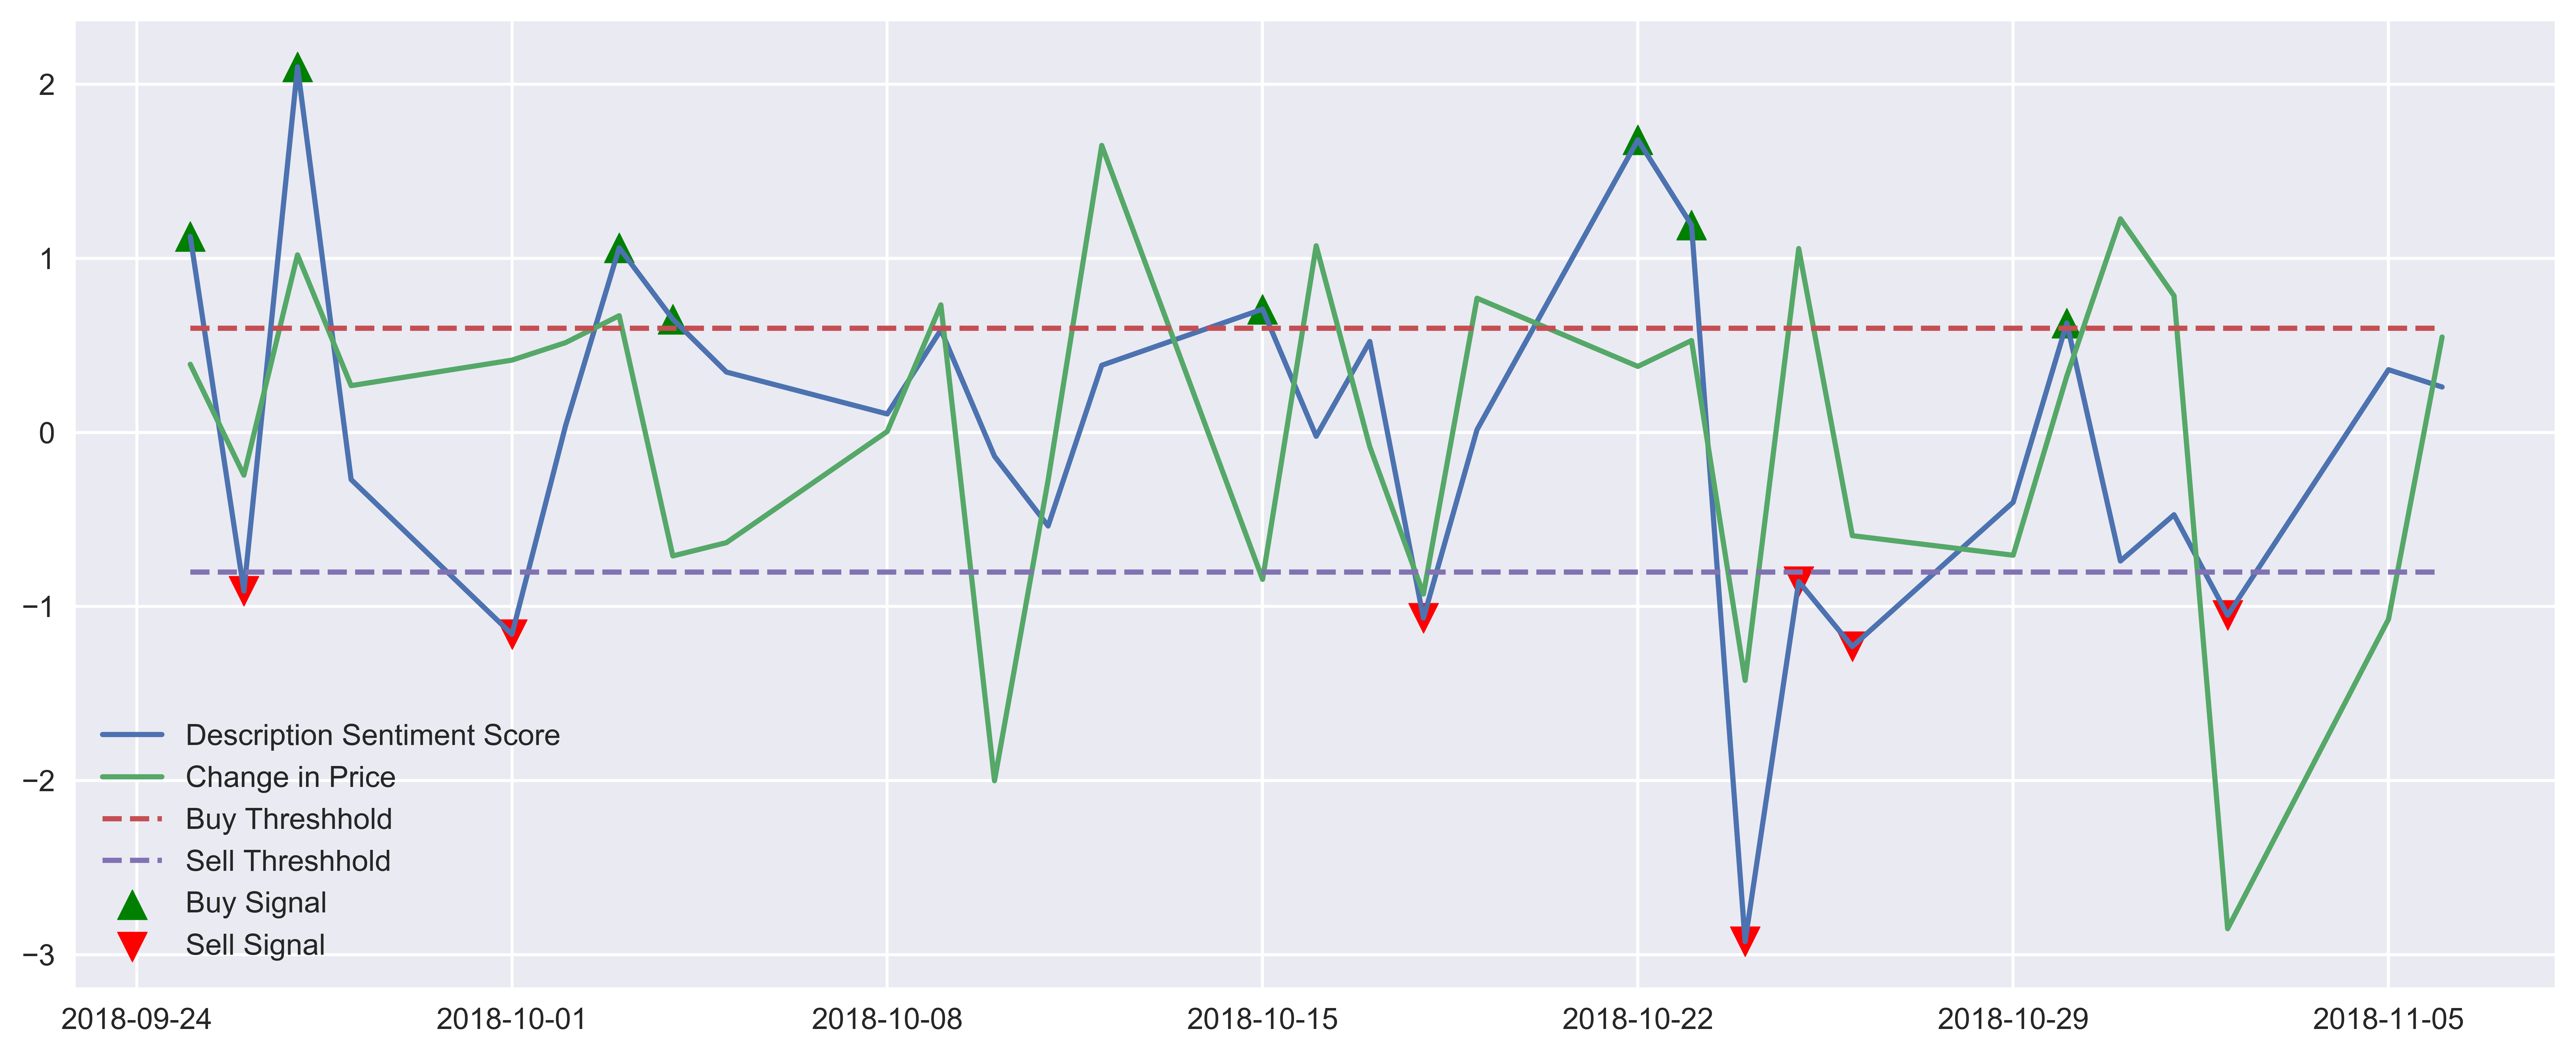

In [15]:
bt = 0.6
st = -0.8

finalS["bt"] = bt
bt_series = finalS["bt"]
finalS["st"] = st
st_series = finalS["st"]

plt.plot(desc_score)
plt.plot(abschange)
plt.plot(bt_series, linestyle='--')
plt.plot(st_series, linestyle='--')
plt.scatter(desc_score[desc_score > bt].index.values, desc_score[desc_score > bt].values, label='skitscat', color='green', s=100, marker="^")
plt.scatter(desc_score[desc_score < st].index.values, desc_score[desc_score < st].values, label='skitscat', color='red', s=100, marker="v")
plt.legend(["Description Sentiment Score", "Change in Price", "Buy Threshhold", "Sell Threshhold", "Buy Signal", "Sell Signal"])
plt.show()